# **Covid 19 Detection Model**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [72]:
Train_path = "train"
Val_path = "test"

In [9]:
 model = Sequential()
    
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
    
model.add(Flatten())
    
    # Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Binary classification
    


C:\Users\Ahmad Afzal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
# #CNN based model in keras

# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])


In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 26, 26, 128)      

# Training Model from Scratch

In [4]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

3.0.5
2.16.1


In [82]:
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,
 )
test_datagen = ImageDataGenerator(rescale = 1./255)


In [83]:
train_generator = train_datagen.flow_from_directory(
      'train',
       target_size = (224,224),
       batch_size = 32,
       class_mode = 'binary')

Found 2741 images belonging to 2 classes.


In [84]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [85]:
validation_generator = test_datagen.flow_from_directory(
     'test',
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary')

Found 513 images belonging to 2 classes.


In [38]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs = 20,
#     validation_data = validation_generator,
#     validation_steps = len(validation_generator)
#     )


**Checking Loss**

In [39]:
# model.save("model_adv.h5")

In [40]:
# model.evaluate(train_generator)

In [41]:
# model.evaluate(validation_generator)

# Test images

In [5]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [2]:
model = load_model('covid_model_adv.h5')

In [3]:
train_generator.class_indices

NameError: name 'train_generator' is not defined

In [5]:
y_actual = []
y_test = []


In [6]:
for i in os.listdir("val/normal/"):
    img = image.load_img("val/normal/"+i, target_size=(224,224))
    img - image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

In [11]:
for i in os.listdir("val/covid/"):
    img = image.load_img("val/covid/"+i, target_size=(224,224))
    img - image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

In [12]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)


In [13]:
threshold = 0.5

In [14]:
y_test = (y_test > threshold).astype(int)

In [16]:
y_actual = np.concatenate((np.ones(len(os.listdir("val/normal"))), np.zeros(len(os.listdir("val/covid")))))


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_actual, y_test)

In [19]:
import seaborn as sns

<Axes: >

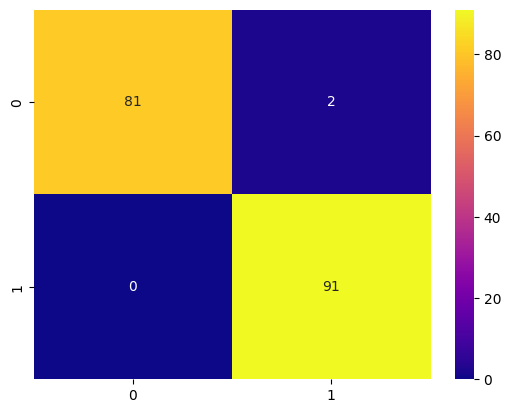

In [20]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [21]:
from sklearn.metrics import accuracy_score, f1_score


In [22]:
final_accuracy = accuracy_score(y_actual, y_test)
print("Accuracy: {:.2f}%".format(final_accuracy * 100))

Accuracy: 98.85%


In [23]:
f1 = f1_score(y_actual, y_test)
print("F1 Score: {:.2f}".format(f1))

F1 Score: 0.99


In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [5]:
model = load_model('covid_model_adv.h5')

In [10]:
img = image.load_img("C:\\Users\\Ahmad Afzal\\Desktop\\project setup\\Lungs Diseases\\COVID19+PNEUMONIA+NORMAL Chest X-Ray Image Dataset\\NORMAL\\NORMAL_16.png" , target_size=(224,224))
img - image.img_to_array(img)
img = np.expand_dims(img, axis=0)
p = model.predict(img)
    

if p[0][0] < 0.5:
    print("Corona")
else:
    print("Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Normal
